In [23]:
# Created By Rupesh Basnet
# Testing out some pre-existing resources for pre-processing the tweets for WITBragDay as a framework for other 
# past events
# coding: utf-8

In [1]:
import csv
import nltk
import pandas as pd

In [67]:
data = pd.read_csv("WITBragDay.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [2]:
# Viewing the top 5 data
data.head(5)
data.columns

NameError: name 'data' is not defined

In [69]:
data.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu Aug 17 23:46:00 +0000 2017,WITBragDay,NaN,NaN,0,898330098876661760,NaN,NaN,NaN,...,5277,1006,509,San Francisco,Carina C. Zona,cczona,69411,NaN,http://patreon.com/cczona,false
1,NaN,Sun Aug 13 08:31:30 +0000 2017,NaN,NaN,NaN,0,896650407942008832,NaN,NaN,NaN,...,168,341,2,NaN,lowkey☠️,pahareya,12512,NaN,NaN,false
2,NaN,Thu Aug 17 22:12:33 +0000 2017,NaN,NaN,NaN,0,898306582819160064,NaN,NaN,NaN,...,296,740,7,"London, England",ash,ashiesdollparts,18869,NaN,https://Instagram.com/ashiesdollparts,false
3,NaN,Thu Aug 17 23:23:29 +0000 2017,WITBragDay,NaN,NaN,0,898324433001103361,NaN,NaN,NaN,...,1499,607,83,NaN,Peter Barfuss 𒀱,bofh453,55620,NaN,NaN,false
4,NaN,Thu Aug 17 21:52:20 +0000 2017,NaN,NaN,NaN,0,898301492423081984,NaN,NaN,NaN,...,3331,1729,60,"London, England",Kimberly M,kimpmurrell,7582,NaN,NaN,false


In [70]:
non_retweet = data[data['retweet_screen_name'].isnull()]

In [71]:
non_retweet.shape

(4409, 34)

In [72]:
data.shape
# It looks like alot of the tweets were retweets which would distort the data

(29512, 34)

In [73]:
clean_data = non_retweet.filter(items = ["created_at","hashtags","text","favorite_count","lang","place","geo","user_location","retweet_count", "retweet_screen_name"])

In [74]:
clean_data.head(5)

,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name
8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN
13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN
16,Thu Aug 17 22:15:48 +0000 2017,WITBragDay,My coding knowledge makes a difference and imp...,6,en,NaN,"Zionsville, IN",2,NaN
44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN
46,Thu Aug 17 23:22:06 +0000 2017,WITBragDay,Recruiters should definitely be scrolling thro...,203,en,NaN,/usr/local/sin,76,NaN


In [51]:
df = clean_data

In [52]:
df.columns

Index([u'created_at', u'hashtags', u'text', u'favorite_count', u'lang', u'place', u'user_location', u'retweet_count', u'retweet_screen_name'], dtype='object')

In [53]:
df.dtypes

created_at             object
hashtags               object
text                   object
favorite_count         object
lang                   object
place                  object
user_location          object
retweet_count          object
retweet_screen_name    object
dtype: object

In [54]:
# We will have to convert the object created_at into a datetime for now
test = pd.to_datetime('Thu Aug 17 23:46:00 +0000 2017', format='%a %b %d %H:%M:%S +0000 %Y')
# Still kept the original created_at date for later modification
df['date'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [55]:
df.dtypes

created_at                     object
hashtags                       object
text                           object
favorite_count                 object
lang                           object
place                          object
user_location                  object
retweet_count                  object
retweet_screen_name            object
date                   datetime64[ns]
dtype: object

In [56]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [57]:
df.head(5)

,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date
8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29
13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25
16,Thu Aug 17 22:15:48 +0000 2017,WITBragDay,My coding knowledge makes a difference and imp...,6,en,NaN,"Zionsville, IN",2,NaN,2017-08-17 22:15:48
44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01
46,Thu Aug 17 23:22:06 +0000 2017,WITBragDay,Recruiters should definitely be scrolling thro...,203,en,NaN,/usr/local/sin,76,NaN,2017-08-17 23:22:06


In [6]:
# Changing the settings of pd to view all the tweet's text
pd.set_option('display.max_colwidth', -1)

In [59]:
df.head(5).text

8     3 degrees in building industry and they rejected me because #women. IT industry welcomed me with open arms. Not a single regret #WITBragDay
13    @azimman @LaunchDarkly sounds like you should look at the #WITBragDay tag :P                                                               
16    My coding knowledge makes a difference and improves the lives of my coworkers and our customers. And it's the coolest feeling. #WITBragDay 
44    Built a ECS JSON-generating container definition module entirely in Terraform, because why would you not. #WITBragDay                      
46    Recruiters should definitely be scrolling through #WITBragDay for their lists. Tons of awesome talent in there.                            
Name: text, dtype: object

In [60]:
df.to_csv('WITBrag_Clean_Noretweets.csv')

In [3]:
df = pd.read_csv("WITBrag_Clean_Noretweets.csv")

In [4]:
#testing tokenization
from nltk.tokenize import word_tokenize
test_tweet = 'RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D'
word_tokenize(test_tweet)
# Note is punkt is not installed just use the terminal to download it 

['RT',
 '@',
 'alicegoldfuss',
 ':',
 'So',
 'happy',
 'to',
 'hear',
 'women',
 'getting',
 'recruiter',
 'pings',
 'after',
 '#',
 'WITBragDay',
 ':',
 'D']

In [5]:
# Emojis and mentions and hashtags are being tokenized
# Taken from a blog https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
import re

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def remove_emoji(data):
    if not data:
        return data
    if not isinstance(data, basestring):
        return data
    try:
    # UCS-4
        patt = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
    # UCS-2
        patt = re.compile(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return patt.sub('', data)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    s = s.decode('unicode-escape').encode('latin1').decode('utf8')
    data = remove_emoji(s)
    tokens = tokenize(data)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

test_tweet = 'RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D'
print (preprocess(test_tweet))

[u'RT', u'@alicegoldfuss', u':', u'So', u'happy', u'to', u'hear', u'women', u'getting', u'recruiter', u'pings', u'after', u'#WITBragDay', u':D']


In [6]:
test = df.head(20).text

In [7]:
test[7]

'\xf0\x9f\x91\x8d\xf0\x9f\x8f\xbb\nRT @matthewbretten: @ColetteWeston @drjessicabarker Definitely a #WITBragDay'

In [8]:
preprocess(test[7])

[u'RT',
 u'@matthewbretten',
 u':',
 u'@ColetteWeston',
 u'@drjessicabarker',
 u'Definitely',
 u'a',
 u'#WITBragDay']

In [9]:
# Removing all stop words
from nltk.corpus import stopwords
import string

punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

In [10]:
import operator 
from collections import Counter

terms_all = [term for term in preprocess('RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D')]
terms_stop = [term for term in preprocess('RT @alicegoldfuss: So happy to hear women getting recruiter pings after #WITBragDay :D') if term not in stop]

In [11]:
terms_all

[u'RT',
 u'@alicegoldfuss',
 u':',
 u'So',
 u'happy',
 u'to',
 u'hear',
 u'women',
 u'getting',
 u'recruiter',
 u'pings',
 u'after',
 u'#WITBragDay',
 u':D']

In [12]:
terms_stop

[u'RT',
 u'@alicegoldfuss',
 u'So',
 u'happy',
 u'hear',
 u'women',
 u'getting',
 u'recruiter',
 u'pings',
 u'#WITBragDay',
 u':D']

In [13]:
count_all = Counter()
for index, row in df.iterrows():     
    terms_all = [term for term in preprocess(row['text'])]
    # Update the counter
    count_all.update(terms_all)
print(count_all.most_common(5))

[(u'.', 2977), (u'#WITBragDay', 2530), (u'!', 1537), (u',', 1434), (u'to', 1373)]


In [14]:
# Create a Counter Collection
count_all = Counter()
# Iterate over the Dataframe rows
for index, row in df.iterrows():     
    # Get the terms of each tweet while preprocessing it and remove the stop words from the tweet
    terms_stop = [term for term in preprocess(row['text']) if term not in stop and not term.startswith(r"\x")]
    # Update the counter
    count_all.update(terms_stop)
print(count_all.most_common(5))

[(u'#WITBragDay', 2530), (u'I', 1289), (u'women', 358), (u'tech', 346), (u'amp', 330)]


In [15]:
count_all.most_common(20)

[(u'#WITBragDay', 2530),
 (u'I', 1289),
 (u'women', 358),
 (u'tech', 346),
 (u'amp', 330),
 (u'#WiTBragDay', 235),
 (u"I'm", 219),
 (u'The', 200),
 (u'code', 179),
 (u'amazing', 173),
 (u'This', 170),
 (u'hashtag', 169),
 (u'tweets', 163),
 (u'\ufe0f', 159),
 (u'work', 156),
 (u'one', 151),
 (u'awesome', 147),
 (u'first', 143),
 (u'many', 128),
 (u'Thank', 124)]

In [18]:
count_all.pop(u'\ufe0f')

KeyError: u'\ufe0f'

In [19]:
count_all.pop(u'So')

123

In [20]:
# Dump the data into a json
import json
# Assign frequency count into a dictionary
dicc = dict(count_all.most_common(20))
# Iterate over the dicitonary and convert it into a JSON structure for D3.js
values = [{"text": k, "size": v} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"text": "code", "size": 179}, {"text": "Thank", "size": 124}, {"text": "I", "size": 1289}, {"text": "many", "size": 128}, {"text": "awesome", "size": 147}, {"text": "work", "size": 156}, {"text": "#WiTBragDay", "size": 235}, {"text": "first", "size": 143}, {"text": "amazing", "size": 173}, {"text": "This", "size": 170}, {"text": "#WITBragDay", "size": 2530}, {"text": "tech", "size": 346}, {"text": "hashtag", "size": 169}, {"text": "tweets", "size": 163}, {"text": "amp", "size": 330}, {"text": "I\'m", "size": 219}, {"text": "one", "size": 151}, {"text": "The", "size": 200}, {"text": "#witbragday", "size": 119}, {"text": "women", "size": 358}]'

In [21]:
# Dump json in another format
import json
dicc = dict(count_all.most_common(20))
values = [{k: v} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"code": 179}, {"Thank": 124}, {"I": 1289}, {"many": 128}, {"awesome": 147}, {"work": 156}, {"#WiTBragDay": 235}, {"first": 143}, {"amazing": 173}, {"This": 170}, {"#WITBragDay": 2530}, {"tech": 346}, {"hashtag": 169}, {"tweets": 163}, {"amp": 330}, {"I\'m": 219}, {"one": 151}, {"The": 200}, {"#witbragday": 119}, {"women": 358}]'

In [19]:
# Another format JSon dump
import json
dicc = dict(count_all.most_common())
json.dumps(dicc)

'{"https://t.co/B8rt5Rago9": 1, "https://t.co/CuFqmkZgL5": 1, "https://t.co/NyJcLNIbHw": 1, "https://t.co/QPM02FxRD9": 1, "https://t.co/jFGXQVdSb3": 1, "four": 1, "Does": 2, "Olympics": 1, "She\'s": 7, "https://t.co/cZxDe8kes3": 1, "https://t.co/NxCKa8ursr": 1, "escribi": 1, "Until": 1, "@UWConline": 1, "#badssl": 1, "Starting": 1, "igual": 1, "Western": 2, "#WomenRock": 1, "lord": 1, "Merece": 1, "@fscons": 1, "nobleza": 1, "@Juli_Piruli": 1, "dynamic": 1, "regional": 4, "@bzztbaa": 1, "forties": 1, "#womeninstem": 3, "bringing": 4, "@blaurela": 1, "https://t.co/CUWdNxdMPN": 1, "https://t.co/x3nQdYM0uR": 1, "Less": 1, "#Knife": 1, "https://t.co/RS3wOPliB6": 1, "oooo": 2, "#ITRespect": 1, "#MiracleTreatDay": 11, "https://t.co/Ad0dtVGDqE": 1, "Paul": 1, "straight": 2, "#azure": 1, "Rachel": 1, "Praqma": 1, "Shiko": 1, "tired": 2, "https://t.co/XQTboIS99c": 1, "1997,": 2, "elegant": 1, "second": 3, "@AthenasinTech": 1, "@Empiric_UK": 2, "@TeamMediaocean": 1, "relieving": 1, "\\udd29": 4,

In [21]:
type(dicc)

dict

In [22]:
# Dump json in another format
import json
dicc = dict(count_all.most_common(40))
values = [{"id": k, "group": 1} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"group": 1, "id": "code"}, {"group": 1, "id": "love"}, {"group": 1, "id": "Thank"}, {"group": 1, "id": "people"}, {"group": 1, "id": "awesome"}, {"group": 1, "id": "\\u200d"}, {"group": 1, "id": "years"}, {"group": 1, "id": "#witbragday"}, {"group": 1, "id": "You"}, {"group": 1, "id": "The"}, {"group": 1, "id": "inspiring"}, {"group": 1, "id": "I\'ve"}, {"group": 1, "id": "#womenintech"}, {"group": 1, "id": "#WITBragDay"}, {"group": 1, "id": "1"}, {"group": 1, "id": "This"}, {"group": 1, "id": "amazing"}, {"group": 1, "id": "2"}, {"group": 1, "id": "tweets"}, {"group": 1, "id": "stories"}, {"group": 1, "id": "\\ud83c"}, {"group": 1, "id": "Women"}, {"group": 1, "id": "brag"}, {"group": 1, "id": "I"}, {"group": 1, "id": "#WiTBragDay"}, {"group": 1, "id": "know"}, {"group": 1, "id": "hashtag"}, {"group": 1, "id": "amp"}, {"group": 1, "id": "I\'m"}, {"group": 1, "id": "one"}, {"group": 1, "id": "My"}, {"group": 1, "id": "day"}, {"group": 1, "id": "women"}, {"group": 1, "id": "great"}, 

In [27]:
count_all_terms_only_once = Counter()
for index, row in df.iterrows():     
    terms_all = [term for term in preprocess(row['text'])]
    terms_single = set(terms_all)
    # Update the counter
    count_all_terms_only_once.update(terms_single)
print(count_all_terms_only_once.most_common(5))

[(u'#WITBragDay', 2523), (u'.', 1817), (u'to', 1133), (u'!', 1120), (u'the', 1083)]


In [28]:
# Only look at the hashtags
count_all_hash = Counter()
for index, row in df.iterrows():     
    terms_hash = [term for term in preprocess(row['text']) 
              if term.startswith('#')]
    # Update the counter
    count_all_hash.update(terms_hash)
print(count_all_hash.most_common(5))

[(u'#WITBragDay', 2530), (u'#WiTBragDay', 235), (u'#witbragday', 119), (u'#womenintech', 104), (u'#WITBragday', 72)]


In [29]:
count_all_term_only = Counter()
for index, row in df.iterrows():     
    terms_only = [term for term in preprocess(row['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
    # Update the counter
    count_all_term_only.update(terms_only)
print(count_all_term_only.most_common(5))

[(u'I', 1289), (u'women', 358), (u'tech', 346), (u'amp', 330), (u"I'm", 219)]


In [30]:
from nltk import bigrams 
 
terms_bigram = bigrams(terms_stop)

In [31]:
count_all_bigram = Counter()
for index, row in df.iterrows():     
    terms_stop = [term for term in preprocess(row['text']) if term not in stop]
    # Update the counter
    terms_bigram = bigrams(terms_stop)
    count_all_bigram.update(terms_bigram)
print(count_all_bigram.most_common(5))

[((u'women', u'tech'), 82), ((u'#WITBragDay', u'I'), 82), ((u'#WITBragDay', u'tweets'), 77), ((u'I', u'love'), 51), ((u'The', u'latest'), 50)]


In [32]:
import json
dicc = dict(count_all_bigram.most_common(40))
values = [{"target": k[0], "source": k[1], "strength": v/100.0} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"source": "hashtag", "strength": 0.37, "target": "#WITBragDay"}, {"source": "#WITBragDay", "strength": 0.23, "target": "check"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Loving"}, {"source": "tweets", "strength": 0.77, "target": "#WITBragDay"}, {"source": "\\u200d", "strength": 0.38, "target": "\\u200d"}, {"source": "From", "strength": 0.21, "target": "King"}, {"source": "tech", "strength": 0.82, "target": "women"}, {"source": "You", "strength": 0.2, "target": "Thank"}, {"source": "women", "strength": 0.33, "target": "amazing"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Proud"}, {"source": "n", "strength": 0.24, "target": "\\u00fc"}, {"source": "industry", "strength": 0.22, "target": "software"}, {"source": "got", "strength": 0.2, "target": "I"}, {"source": "#WITBragDay", "strength": 0.27, "target": "Check"}, {"source": "#WITBragDay", "strength": 0.26, "target": "reading"}, {"source": "#WITBragDay", "strength": 0.23, "target": "stories"}, {"source": "gende

In [33]:
type(values)

list

In [34]:
new_dict = []
values = [{"target": k[0], "source": k[1], "strength": v/100.0} for k, v in dicc.iteritems()]
json.dumps(values)

'[{"source": "hashtag", "strength": 0.37, "target": "#WITBragDay"}, {"source": "#WITBragDay", "strength": 0.23, "target": "check"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Loving"}, {"source": "tweets", "strength": 0.77, "target": "#WITBragDay"}, {"source": "\\u200d", "strength": 0.38, "target": "\\u200d"}, {"source": "From", "strength": 0.21, "target": "King"}, {"source": "tech", "strength": 0.82, "target": "women"}, {"source": "You", "strength": 0.2, "target": "Thank"}, {"source": "women", "strength": 0.33, "target": "amazing"}, {"source": "#WITBragDay", "strength": 0.21, "target": "Proud"}, {"source": "n", "strength": 0.24, "target": "\\u00fc"}, {"source": "industry", "strength": 0.22, "target": "software"}, {"source": "got", "strength": 0.2, "target": "I"}, {"source": "#WITBragDay", "strength": 0.27, "target": "Check"}, {"source": "#WITBragDay", "strength": 0.26, "target": "reading"}, {"source": "#WITBragDay", "strength": 0.23, "target": "stories"}, {"source": "gende

In [35]:
for a in values:
    if not any(d['id'] == a['target'] for d in new_dict):
    # does not exist
        new_dict.append({"id": a['target'], "group": 1})
    if not any(d['id'] == a['source'] for d in new_dict):
    # does not exist
        new_dict.append({"id": a['source'], "group": 2})

In [36]:
json.dumps(new_dict)

'[{"group": 1, "id": "#WITBragDay"}, {"group": 2, "id": "hashtag"}, {"group": 1, "id": "check"}, {"group": 1, "id": "Loving"}, {"group": 2, "id": "tweets"}, {"group": 1, "id": "\\u200d"}, {"group": 1, "id": "King"}, {"group": 2, "id": "From"}, {"group": 1, "id": "women"}, {"group": 2, "id": "tech"}, {"group": 1, "id": "Thank"}, {"group": 2, "id": "You"}, {"group": 1, "id": "amazing"}, {"group": 1, "id": "Proud"}, {"group": 1, "id": "\\u00fc"}, {"group": 2, "id": "n"}, {"group": 1, "id": "software"}, {"group": 2, "id": "industry"}, {"group": 1, "id": "I"}, {"group": 2, "id": "got"}, {"group": 1, "id": "Check"}, {"group": 1, "id": "reading"}, {"group": 1, "id": "stories"}, {"group": 1, "id": "The"}, {"group": 2, "id": "gender"}, {"group": 2, "id": "bug"}, {"group": 2, "id": "applaud"}, {"group": 1, "id": "1"}, {"group": 2, "id": "st"}, {"group": 1, "id": "\\ufe0f"}, {"group": 1, "id": "Last"}, {"group": 2, "id": "love"}, {"group": 1, "id": "\\ud83e"}, {"group": 2, "id": "\\udd13"}, {"gro

In [37]:
count_all_bigram.most_common(20)

[((u'women', u'tech'), 82),
 ((u'#WITBragDay', u'I'), 82),
 ((u'#WITBragDay', u'tweets'), 77),
 ((u'I', u'love'), 51),
 ((u'The', u'latest'), 50),
 ((u'So', u'many'), 43),
 ((u'Women', u'Tech'), 38),
 ((u'\u200d', u'\u200d'), 38),
 ((u'1', u'st'), 37),
 ((u'#WITBragDay', u'hashtag'), 37),
 ((u'I', u'work'), 36),
 ((u'I', u'know'), 35),
 ((u'amazing', u'women'), 33),
 ((u'I', u'wrote'), 32),
 ((u'hashtag', u'#WITBragDay'), 31),
 ((u'\ufe0f', u'\ufe0f'), 29),
 ((u'tech', u'#WITBragDay'), 28),
 ((u'Check', u'#WITBragDay'), 27),
 ((u'reading', u'#WITBragDay'), 26),
 ((u'#WITBragDay', u'The'), 25)]

In [38]:
# Geo tagging and user locations

In [39]:
df.shape

(4409, 11)

In [40]:
df.head(5)

,Unnamed: 0,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date
0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29
1,13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25
2,16,Thu Aug 17 22:15:48 +0000 2017,WITBragDay,My coding knowledge makes a difference and imp...,6,en,NaN,"Zionsville, IN",2,NaN,2017-08-17 22:15:48
3,44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01
4,46,Thu Aug 17 23:22:06 +0000 2017,WITBragDay,Recruiters should definitely be scrolling thro...,203,en,NaN,/usr/local/sin,76,NaN,2017-08-17 23:22:06


In [41]:
count_all_locat = Counter()
for index, row in df.iterrows():     
    terms_only = [term for term in preprocess(str(row['user_location'])) if term not in stop]
    # Update the counter
    terms_bigram = bigrams(terms_only)
    count_all_locat.update(terms_bigram)
print(count_all_locat.most_common(5))

[((u'San', u'Francisco'), 105), ((u'Nairobi', u'Kenya'), 98), ((u'Minneapolis', u'MN'), 86), ((u'MN', u'USA'), 80), ((u'London', u'England'), 77)]


In [42]:
print(count_all_locat.most_common(20))

[((u'San', u'Francisco'), 105), ((u'Nairobi', u'Kenya'), 98), ((u'Minneapolis', u'MN'), 86), ((u'MN', u'USA'), 80), ((u'London', u'England'), 77), ((u'Lagos', u'Nigeria'), 72), ((u'South', u'Africa'), 70), ((u'Francisco', u'CA'), 64), ((u'New', u'York'), 62), ((u'Seattle', u'WA'), 51), ((u'Washington', u'DC'), 49), ((u'Cape', u'Town'), 41), ((u'United', u'Kingdom'), 40), ((u'United', u'States'), 38), ((u'Bay', u'Area'), 32), ((u'Town', u'South'), 30), ((u'Houston', u'TX'), 28), ((u'Boston', u'MA'), 27), ((u'New', u'Zealand'), 27), ((u'Kingdom', u'Saudi'), 23)]


In [43]:
# Sentiment analysis with textblob

In [44]:
# loop through the df and run a textblob on it
test = df.head(1).text
term_sentiment_test = [term for term in preprocess(test[0]) if term not in stop]
term_sentiment_test

[u'3',
 u'degrees',
 u'building',
 u'industry',
 u'rejected',
 u'#women',
 u'IT',
 u'industry',
 u'welcomed',
 u'open',
 u'arms',
 u'Not',
 u'single',
 u'regret',
 u'#WITBragDay']

In [45]:
type(term_sentiment_test)

list

In [46]:
str1 = ' '.join(term_sentiment_test)

In [47]:
str1

u'3 degrees building industry rejected #women IT industry welcomed open arms Not single regret #WITBragDay'

In [48]:
from textblob import TextBlob

In [49]:
def sentiment_calc(text):
    try:
        term_sentiment = [term for term in preprocess(text) if term not in stop]
        str_contact = ' '.join(term_sentiment)
        return TextBlob(str_contact).sentiment
    except:
        return None

In [50]:
df['sentiment'] = df['text'].apply(sentiment_calc)
# Returns the Sentiment(polarity, subjectivity)

In [51]:
df.dtypes

Unnamed: 0               int64
created_at              object
hashtags                object
text                    object
favorite_count           int64
lang                    object
place                   object
user_location           object
retweet_count            int64
retweet_screen_name    float64
date                    object
sentiment               object
dtype: object

In [52]:
def polarity(sentiment):
    if sentiment.polarity > 0: 
        return 'positive'
    elif sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [53]:
df['polarity'] = df['sentiment'].apply(polarity)

In [54]:
df.head(2)

,Unnamed: 0,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity
0,8,Sun Aug 13 08:32:29 +0000 2017,women WITBragDay,3 degrees in building industry and they reject...,9,en,NaN,"Wroclaw, Poland",2,NaN,2017-08-13 08:32:29,"(0.0178571428571, 0.357142857143)",positive
1,13,Thu Aug 17 23:34:25 +0000 2017,WITBragDay,@azimman @LaunchDarkly sounds like you should ...,1,en,NaN,/usr/local/sin,0,NaN,2017-08-17 23:34:25,"(0.75, 1.0)",positive


In [88]:
df.to_csv('WITBrag_Clean_Noretweets_Sentiments.csv')

In [55]:
df = pd.read_csv("WITBrag_Clean_Noretweets_Sentiments.csv")

In [56]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
created_at              object
hashtags                object
text                    object
favorite_count           int64
lang                    object
place                   object
user_location           object
retweet_count            int64
retweet_screen_name    float64
date                    object
sentiment               object
polarity                object
dtype: object

In [57]:
from geotext import GeoText

In [58]:
df.head(1).user_location[0]

'Wroclaw, Poland'

In [59]:
# Testing
places = GeoText("New York")
count = places.country_mentions
# "London"
if 'US' in count:
    print "found"
else:
    print "not"

found


In [60]:
# Get the City to State Dictionary
from cityToState import city_to_state_dict

In [61]:
   states = {

         'Alabama','Alaska','Arizona','Arkansas','California','Colorado',
         'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho', 
         'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine' 'Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi', 'Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio',    
         'Oklahoma','Oregon','Pennsylvania','Rhode Island',
         'South  Carolina','South Dakota','Tennessee','Texas','Utah',
         'Vermont','Virginia','Washington','West Virginia',
         'Wisconsin','Wyoming'
    }


In [62]:
def filterUSLocations(address):
    str_address = str(address) # Convert the address to string
    userCountry = GeoText(str_address).country_mentions # Use Geotext to get the country mentioned in the addr.
    if 'US' in userCountry:   # This is a US address
        city = GeoText(str_address).cities
        # first check if the city name is somehow . a state name as well
        if city:
            if city[0] in states:
                return city[0]
            if city[0] in city_to_state_dict:
                return city_to_state_dict[city[0]]
        else:
            return
    else:
        return
    

In [63]:
print(filterUSLocations("asdfasdf"))

None


In [64]:
df['US_State'] = df['user_location'].apply(filterUSLocations)

In [65]:
# create a new df with only US states
df.dropna(subset=['US_State'], inplace=True)

In [66]:
# Only has US states
df.head(10)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,US_State
3,3,44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01,"Sentiment(polarity=0.0, subjectivity=0.625)",neutral,Florida
5,5,51,Thu Aug 17 23:26:32 +0000 2017,WITBragDay,Started a company doing DevOps consulting. Sti...,22,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:26:32,"Sentiment(polarity=0.8, subjectivity=1.0)",positive,Florida
29,29,220,Sun Aug 13 08:43:21 +0000 2017,WITBragDay,Check out this hashtag #WITBragDay,3,en,"San Jose, CA","San Jose, CA",0,NaN,2017-08-13 08:43:21,"Sentiment(polarity=0.0, subjectivity=0.0)",neutral,California
39,39,262,Sun Aug 13 08:09:01 +0000 2017,WITBragDay UX UXAustralia,Wow! I'm loving the stories from #WITBragDay t...,4,en,"Melbourne, Victoria","Melbourne, Australia",1,NaN,2017-08-13 08:09:01,"Sentiment(polarity=0.39999999999999997, subjec...",positive,Florida
65,65,444,Sun Aug 13 08:19:01 +0000 2017,WITBragDay,If you're looking for something positive to lo...,7,en,NaN,"Washington, DC",4,NaN,2017-08-13 08:19:01,"Sentiment(polarity=0.22727272727272727, subjec...",positive,Washington
68,68,498,Sun Aug 13 07:31:57 +0000 2017,WITBragDay,This is bad ass! 😎 #WITBragDay https://t.co/8...,14,en,NaN,"Dublin, Ireland",4,NaN,2017-08-13 07:31:57,"Sentiment(polarity=-0.6999999999999998, subjec...",negative,California
82,82,692,Sun Aug 13 07:50:19 +0000 2017,WITBragDay Ireland,Spread the word about #WITBragDay. I want to h...,9,en,NaN,"Dublin, Ireland",4,NaN,2017-08-13 07:50:19,"Sentiment(polarity=0.0, subjectivity=0.0)",neutral,California
101,101,821,Sun Aug 13 07:21:12 +0000 2017,WITBragDay,Very inspiring to read others stories #WITBrag...,3,en,NaN,Cambridge,0,NaN,2017-08-13 07:21:12,"Sentiment(polarity=0.65, subjectivity=1.0)",positive,Massachusetts
103,103,824,Sun Aug 13 07:20:44 +0000 2017,NaN,Thank you for making Gmail as it is. :D https:...,1,en,NaN,"Norfolk, UK",0,NaN,2017-08-13 07:20:44,"Sentiment(polarity=1.0, subjectivity=1.0)",positive,Nebraska
112,112,885,Sun Aug 13 06:40:01 +0000 2017,NaN,This is hella precious! https://t.co/eIZyhncI2G,1,en,NaN,"Houston,Texas",0,NaN,2017-08-13 06:40:01,"Sentiment(polarity=0.5, subjectivity=1.0)",positive,Texas


In [67]:
# The DF is not that accurate right now but will work for the test viz
# Recount all the terms 
# Create a Counter Collection
count_all = Counter()
# Iterate over the Dataframe rows
for index, row in df.iterrows():     
    # Get the terms of each tweet while preprocessing it and remove the stop words from the tweet
    terms_stop = [term for term in preprocess(row['text']) if term not in stop and not term.startswith(r"\x")]
    # Update the counter
    count_all.update(terms_stop)
print(count_all.most_common(5))

[(u'#WITBragDay', 628), (u'I', 334), (u'women', 102), (u'amp', 93), (u'tech', 92)]


In [68]:
# The results are still the same
dff = df

In [1]:
dff.groupby(["US_State", "polarity"]).size()

NameError: name 'dff' is not defined

In [112]:
new_Df = pd.DataFrame({'count' : dff.groupby(["US_State", "polarity"]).size()}).reset_index()

In [117]:
new_Df.head(10)

,US_State,polarity,count
0,Alabama,positive,5
1,Arizona,neutral,4
2,Arizona,positive,5
3,California,negative,10
4,California,neutral,83
5,California,positive,109
6,Colorado,negative,2
7,Colorado,neutral,3
8,Colorado,positive,13
9,Connecticut,neutral,3


In [116]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [133]:
d = {}
for i in new_Df['US_State']:
    ab = us_state_abbrev[i]
    d[ab] = [{new_Df['polarity'][j]: new_Df['count'][j]} for j in new_Df[new_Df['US_State']==i].index]

In [134]:
d

{'AL': [{'positive': 5}],
 'AZ': [{'neutral': 4}, {'positive': 5}],
 'CA': [{'negative': 10}, {'neutral': 83}, {'positive': 109}],
 'CO': [{'negative': 2}, {'neutral': 3}, {'positive': 13}],
 'CT': [{'neutral': 3}],
 'DE': [{'negative': 1}, {'positive': 1}],
 'FL': [{'negative': 3}, {'neutral': 34}, {'positive': 35}],
 'GA': [{'negative': 3}, {'neutral': 23}, {'positive': 8}],
 'HI': [{'positive': 1}],
 'IA': [{'negative': 1}, {'neutral': 2}, {'positive': 3}],
 'ID': [{'positive': 1}],
 'IL': [{'negative': 8}, {'neutral': 21}, {'positive': 30}],
 'IN': [{'negative': 1}, {'neutral': 4}, {'positive': 3}],
 'KS': [{'neutral': 4}, {'positive': 1}],
 'LA': [{'negative': 1}, {'neutral': 3}],
 'MA': [{'negative': 4}, {'neutral': 20}, {'positive': 32}],
 'MD': [{'negative': 1}, {'neutral': 7}, {'positive': 9}],
 'MI': [{'negative': 2}, {'neutral': 7}, {'positive': 8}],
 'MN': [{'negative': 4}, {'neutral': 32}, {'positive': 81}],
 'MO': [{'neutral': 1}, {'positive': 1}],
 'MS': [{'neutral': 1},

In [136]:
new_dictt = new_Df.groupby('US_State')[['polarity','count']].apply(lambda g: list(map(tuple, g.values.tolist()))).to_dict()

In [145]:
# reegexed
reggex = {'AL': {'positive': 5},
 'AZ': {'neutral': 4, 'positive': 5},
 'CA': {'negative': 10, 'neutral': 83, 'positive': 109},
 'CO': {'negative': 2, 'neutral': 3, 'positive': 13},
 'CT': {'neutral': 3},
 'DE': {'negative': 1, 'positive': 1},
 'FL': {'negative': 3, 'neutral': 34, 'positive': 35},
 'GA': {'negative': 3, 'neutral': 23, 'positive': 8},
 'HI': {'positive': 1},
 'IA': {'negative': 1, 'neutral': 2, 'positive': 3},
 'ID': {'positive': 1},
 'IL': {'negative': 8, 'neutral': 21, 'positive': 30},
 'IN': {'negative': 1, 'neutral': 4, 'positive': 3},
 'KS': {'neutral': 4, 'positive': 1},
 'LA': {'negative': 1, 'neutral': 3},
 'MA': {'negative': 4, 'neutral': 20, 'positive': 32},
 'MD': {'negative': 1, 'neutral': 7, 'positive': 9},
 'MI': {'negative': 2, 'neutral': 7, 'positive': 8},
 'MN': {'negative': 4, 'neutral': 32, 'positive': 81},
 'MO': {'neutral': 1, 'positive': 1},
 'MS': {'neutral': 1, 'positive': 2},
 'NC': {'negative': 1, 'neutral': 2, 'positive': 10},
 'NE': {'neutral': 2, 'positive': 2},
 'NH': {'negative': 1, 'neutral': 11, 'positive': 22},
 'NJ': {'negative': 1, 'neutral': 1, 'positive': 6},
 'NM': {'neutral': 4, 'positive': 1},
 'NV': {'neutral': 1, 'positive': 1},
 'NY': {'negative': 12, 'neutral': 32, 'positive': 54},
 'OH': {'neutral': 7, 'positive': 7},
 'OK': {'positive': 1},
 'OR': {'negative': 1, 'neutral': 9, 'positive': 14},
 'PA': {'negative': 3, 'neutral': 23, 'positive': 24},
 'RI': {'negative': 1, 'neutral': 2, 'positive': 8},
 'SC': {'neutral': 1, 'positive': 3},
 'SD': {'negative': 1},
 'TN': {'neutral': 1, 'positive': 5},
 'TX': {'negative': 1, 'neutral': 37, 'positive': 18},
 'WA': {'negative': 17, 'neutral': 57, 'positive': 71},
 'WI': {'negative': 1, 'positive': 1}
         }

In [135]:
type(reggex)

dict

In [141]:
for key in us_state_abbrev:
    if key not in new_dictt:
        print key

Arkansas
West Virginia
North Dakota
Alaska
Wyoming
Utah
Virginia
Montana
Vermont
Kentucky
Maine


In [142]:
li = ["HI", "AK", "FL", "SC", "GA", "AL", "NC", "TN", "RI", "CT", "MA", "ME", "NH", "VT", "NY", "NJ", "PA", "DE", "MD", "WV", "KY", "OH", "MI", "WY", "MT", "ID", "WA", "DC", "TX", "CA", "AZ", "NV", "UT",  "CO", "NM", "OR", "ND", "SD", "NE", "IA", "MS", "IN", "IL", "MN", "WI", "MO", "AR", "OK", "KS", "LS", "VA"]

In [146]:
for i in li:
    if i not in reggex:
        print i

AK
ME
VT
WV
KY
WY
MT
DC
UT
ND
AR
LS
VA


<bound method DataFrame.head of       Unnamed: 0                      created_at  \
0              8  Sun Aug 13 08:32:29 +0000 2017   
1             13  Thu Aug 17 23:34:25 +0000 2017   
2             16  Thu Aug 17 22:15:48 +0000 2017   
3             44  Thu Aug 17 23:25:01 +0000 2017   
4             46  Thu Aug 17 23:22:06 +0000 2017   
5             51  Thu Aug 17 23:26:32 +0000 2017   
6             64  Thu Aug 17 22:10:40 +0000 2017   
7             67  Thu Aug 17 22:12:39 +0000 2017   
8             75  Thu Aug 17 23:19:40 +0000 2017   
9             76  Thu Aug 17 23:35:40 +0000 2017   
10            85  Thu Aug 17 22:09:59 +0000 2017   
11            91  Sun Aug 13 08:41:24 +0000 2017   
12           102  Sun Aug 13 08:41:16 +0000 2017   
13           105  Sun Aug 13 08:39:16 +0000 2017   
14           109  Sun Aug 13 08:38:41 +0000 2017   
15           126  Sun Aug 13 08:40:32 +0000 2017   
16           127  Sun Aug 13 08:37:17 +0000 2017   
17           129  Sun Aug 13 08:

In [69]:
# sentiment overtime and sentiment breakdown
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,US_State
3,3,44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01,"Sentiment(polarity=0.0, subjectivity=0.625)",neutral,Florida
5,5,51,Thu Aug 17 23:26:32 +0000 2017,WITBragDay,Started a company doing DevOps consulting. Sti...,22,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:26:32,"Sentiment(polarity=0.8, subjectivity=1.0)",positive,Florida


In [70]:
df.groupby(["polarity"]).size()

polarity
negative     81
neutral     442
positive    596
dtype: int64

In [75]:
df['NDate'] = pd.to_datetime(df['date'])

In [76]:
df['NDate'] = df['NDate'].dt.strftime('%Y-%m-%d')

In [77]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,created_at,hashtags,text,favorite_count,lang,place,user_location,retweet_count,retweet_screen_name,date,sentiment,polarity,US_State,NDate
3,3,44,Thu Aug 17 23:25:01 +0000 2017,WITBragDay,Built a ECS JSON-generating container definiti...,3,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:25:01,"Sentiment(polarity=0.0, subjectivity=0.625)",neutral,Florida,2017-08-17
5,5,51,Thu Aug 17 23:26:32 +0000 2017,WITBragDay,Started a company doing DevOps consulting. Sti...,22,en,NaN,"Wellington, New Zealand",2,NaN,2017-08-17 23:26:32,"Sentiment(polarity=0.8, subjectivity=1.0)",positive,Florida,2017-08-17


In [78]:
df.groupby(["NDate", "polarity"]).size()

NDate       polarity
2017-08-12  negative     47
            neutral     298
            positive    434
2017-08-13  negative     12
            neutral      81
            positive     93
2017-08-14  negative     11
            neutral      29
            positive     39
2017-08-15  negative      5
            neutral      22
            positive     15
2017-08-16  negative      3
            neutral       6
            positive      7
2017-08-17  negative      3
            neutral       6
            positive      8
dtype: int64

In [80]:
import matplotlib.pyplot as plt
Time = ["2017-08-12", "2017-08-13", "2017-08-14", "2017-08-15", "2017-08-16", "2017-08-17"]
count_negative = [47, 12, 11, 5, 3, 3]
count_neutral = [298, 81, 29, 22, 6, 6]
count_positive = [434, 93, 39, 15, 7, 8]



[]

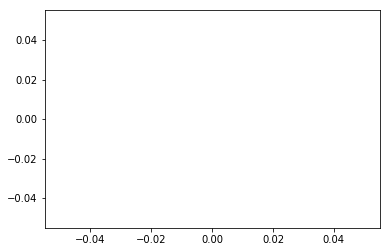

In [84]:
plt.plot()

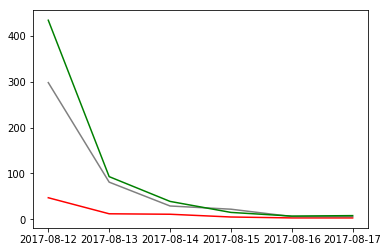

In [91]:
plt.plot(Time, count_negative, color='r')
plt.plot(Time, count_neutral, color='grey')
plt.plot(Time, count_positive, color='g')


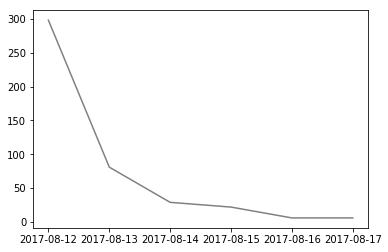

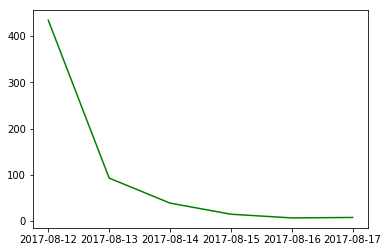

In [87]:
plt.plot(Time, count_positive, color='g')


In [89]:
plt.show

<function matplotlib.pyplot.show>